In [3]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix

In [704]:
jj = 5

name = f'futures_b{jj}.csv'
df_b = pd.read_csv(name, header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'k1', 'k2']
k = 58-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_b.columns = cols2
# df = df.drop(columns=[f"val_{i}" for i in range(11, 21)]+[f"val_{i}" for i in range(31, 71)])
df_h = pd.read_csv(f'futures_t{jj}.csv', header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'k1', 'k2']
k = 58-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_h.columns = cols2
# df = df.drop(columns=[f"val_{i}" for i in range(11, 21)]+[f"val_{i}" for i in range(31, 71)])
ds = pd.concat([df_h, df_b], axis=0).drop_duplicates().dropna()
# ds = ds.drop(columns=[f"val_{i}" for i in range(11, 21)]+[f"val_{i}" for i in range(31, 71)])
# ds = ds.drop(columns=["val_9","val_10","val_19","val_20","val_29","val_30","val_39","val_40","val_49","val_50",])

ds1 = ds[ds.target2>0.2]
ds2 = ds[ds.target2<-0.2]
ds = pd.concat([ds1, ds2])
ds

,coin,target2,target1,n,diff1,diff2,k1,k2,val_1,val_2,...,val_41,val_42,val_43,val_44,val_45,val_46,val_47,val_48,val_49,val_50
6,DOGE,0.650144,1,3,0.359929,0.521684,6,7,0.403219,0.596781,...,0.403219,0.596781,0.467894,0.532106,0.502569,0.497431,0.497857,0.502143,0.509085,0.490915
7,DOGE,0.650144,1,6,0.359929,1.454835,6,7,0.424407,0.575593,...,0.425067,0.574933,0.474409,0.525591,0.508779,0.491221,0.491202,0.508798,0.499698,0.500302
8,DOGE,0.650144,1,9,1.111603,1.809835,6,7,0.457217,0.542783,...,0.425067,0.574933,0.474409,0.525591,0.508779,0.491221,0.491202,0.508798,0.499698,0.500302
9,DOGE,0.650144,1,12,1.242143,1.949260,6,7,0.467288,0.532712,...,0.425067,0.574933,0.474409,0.525591,0.508779,0.491221,0.491202,0.508798,0.499698,0.500302
10,DOGE,0.650144,1,15,1.348937,2.135353,6,7,0.466569,0.533431,...,0.425067,0.574933,0.474409,0.525591,0.508779,0.491221,0.491202,0.508798,0.499698,0.500302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975,SOL,-1.273377,0,6,0.300495,0.502036,8,9,0.407393,0.592607,...,0.400830,0.599170,0.452973,0.547027,0.470630,0.529370,0.584158,0.415842,0.567639,0.432361
4976,SOL,-1.273377,0,9,0.300495,0.502036,8,9,0.455781,0.544219,...,0.400830,0.599170,0.452973,0.547027,0.470630,0.529370,0.584158,0.415842,0.567639,0.432361
4977,SOL,-1.273377,0,12,0.537990,0.754902,8,9,0.476182,0.523818,...,0.400830,0.599170,0.452973,0.547027,0.470630,0.529370,0.584158,0.415842,0.567639,0.432361
4978,SOL,-1.273377,0,15,0.738707,0.956051,8,9,0.514564,0.485436,...,0.400830,0.599170,0.452973,0.547027,0.470630,0.529370,0.584158,0.415842,0.567639,0.432361


In [705]:
ds.groupby('n').size()

n
3     3208
6     3208
9     3209
12    3209
13       2
15    3207
16       3
18    3200
dtype: int64

In [706]:
D = {}
for i in [3, 6, 9, 12, 15, 18]:
    dl = ds[ds.n==i]
    D[i]=dl
for d in D:
    dx = D[d]
    print(d, dx.shape[0])

3 3208
6 3208
9 3209
12 3209
15 3207
18 3200


In [765]:
ds.groupby('coin').size().sort_values(ascending=False).to_frame().T

coin,ETH,DOGE,EOS,DOT,BTC,BCH,UNI,ADA,LINK,ETC,LTC,XRP,SOL,XLM,BNB,FTM,THETA,LUNA,FIL,EGLD
0,431,301,223,179,177,176,171,170,162,157,152,152,124,82,40,38,37,26,19,15


In [786]:
coins = ['ETH', 'DOGE', 'EOS', 'DOT', 'BTC', 'BCH', 'UNI', 'ADA', 'LINK', 'ETC',
         'LTC']
        # 'XRP', 'SOL', 'XLM', 'BNB', 'FTM', 'THETA', 'LUNA', 'FIL', 'EGLD']

In [708]:
# coin = 'matic'.upper()
# dog13 = ds[ds.coin==coin]
# dog13#.shape

In [709]:
# dog13[dog13.target2<0].target2.max(), dog13[dog13.target2>0].target2.min()
# ds[ds.target2<0].target2.max(), ds[ds.target2>0].target2.min()

In [769]:
# coins = ['UNI', 'XRP', 'THETA', 'EGLD', 'ETH', 'DOT', 'XLM', 'ADA', 'LTC', 'LINK', 'ETC', 'BNB', 'SOL', 'EOS', 'BCH', 'FTM', 'LUNA', 'FIL', 'DOGE', 'BTC']

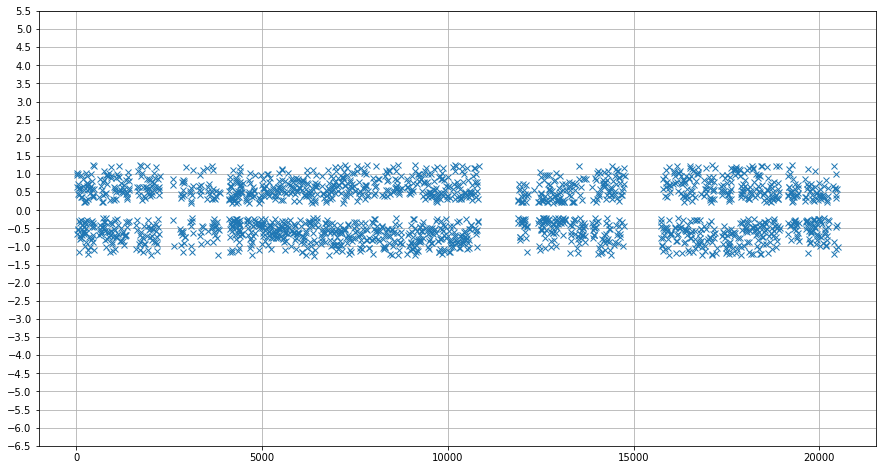

In [789]:
mm = 18
ds = D[mm]
ds.shape
ds = ds[ds.target2<1.25]
ds = ds[ds.target2>-1.25]

fs = []
for coin in coins:
    dr = ds[ds.coin==coin]
    fs.append(dr)
ds = pd.concat(fs)
# ds

plt.figure(figsize=(15, 8))
plt.plot(ds.target2, "x")
# plt.plot(dog13.target2, "x")
# plt.yticks([i/10 for i in range(-10, 11, 5)])
plt.yticks([i/10 for i in range(-65, 58, 5)])
plt.grid()

In [790]:
# dog13.groupby('target1').size()
ds.groupby('target1').size()

target1
0    1050
1     990
dtype: int64

In [791]:
# X = dog13.drop(columns=['coin', 'target1', 'target2', 'n', 'diff1', 'diff2']).values
# Y = dog13.target1.values
X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'diff1', 'diff2', 'k1', 'k2']).values
Y = ds.target1.values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [792]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

kl = 0.2
x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size=kl, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

(y_train==1).sum(), (y_train==0).sum(), 0, (y_test==1).sum(), (y_test==0).sum()

(802, 830, 0, 188, 220)

In [793]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam_v2, rmsprop_v2, gradient_descent_v2
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(52, activation='sigmoid', input_shape=(50,)))
model.add(Dropout(.05))
# model.add(Dense(104, activation='sigmoid'))
# model.add(Dropout(.10))
# model.add(Dense(208, activation='sigmoid'))
# model.add(Dropout(.15))
# model.add(Dense(416, activation='sigmoid'))
# model.add(Dropout(.20))
# model.add(Dense(832, activation='sigmoid'))
# model.add(Dropout(.25))
# model.add(Dense(1664, activation='sigmoid'))
# model.add(Dropout(.30))

# model.add(Dense(416, activation='tanh'))
# model.add(Dropout(.05))
# model.add(Dense(312, activation='linear'))
# model.add(Dropout(.05))
# model.add(Dense(156, activation='relu'))
# model.add(Dropout(.05))

# model.add(Dense(106, activation='hard_sigmoid'))
# model.add(Dense(159, activation='hard_sigmoid'))
# model.add(Dense(212, activation='hard_sigmoid'))
# model.add(Dense(2, activation='hard_sigmoid'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 52)                2652      
_________________________________________________________________
dropout_24 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 53        
Total params: 2,705
Trainable params: 2,705
Non-trainable params: 0
_________________________________________________________________


In [794]:
opt = adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# opt = rmsprop_v2.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# opt = gradient_descent_v2.SGD(learning_rate=0.001, decay=0.0)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# callback= EarlyStopping(monitor='val_loss')
                   
hist = model.fit(x_train, y_train,
          epochs=150,
          validation_data=(x_test, y_test),
          # callbacks=[callback],
          verbose=1)

Epoch 1/150
51/51 [==============================] - 1s 4ms/step - loss: 0.6431 - accuracy: 0.6366 - val_loss: 0.5742 - val_accuracy: 0.7328
Epoch 2/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7083 - val_loss: 0.5433 - val_accuracy: 0.7549
Epoch 3/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7108 - val_loss: 0.5283 - val_accuracy: 0.7549
Epoch 4/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7096 - val_loss: 0.5218 - val_accuracy: 0.7549
Epoch 5/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7206 - val_loss: 0.5170 - val_accuracy: 0.7623
Epoch 6/150
51/51 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.7102 - val_loss: 0.5127 - val_accuracy: 0.7623
Epoch 7/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7286 - val_loss: 0.5088 - val_accuracy: 0.7672
Epoch 8/150
5

Epoch 59/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7629 - val_loss: 0.4433 - val_accuracy: 0.8137
Epoch 60/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7641 - val_loss: 0.4440 - val_accuracy: 0.8137
Epoch 61/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7721 - val_loss: 0.4443 - val_accuracy: 0.8113
Epoch 62/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7604 - val_loss: 0.4425 - val_accuracy: 0.8113
Epoch 63/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7598 - val_loss: 0.4423 - val_accuracy: 0.8039
Epoch 64/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7451 - val_loss: 0.4440 - val_accuracy: 0.8162
Epoch 65/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7672 - val_loss: 0.4412 - val_accuracy: 0.8064
Epoch 

In [795]:
mm

18

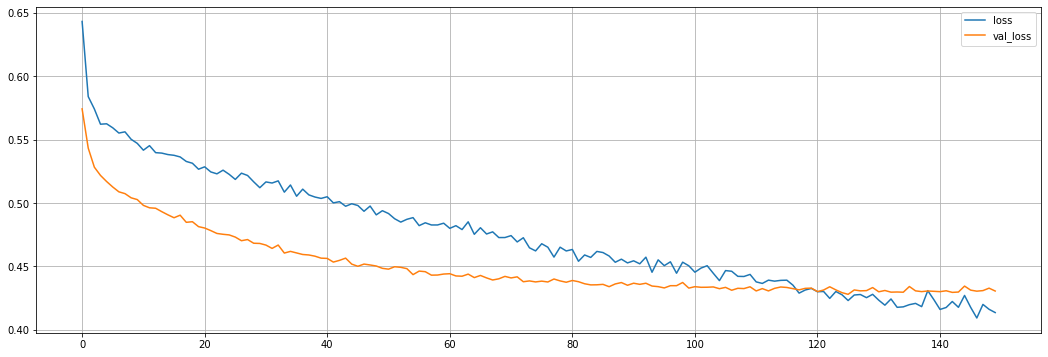

In [796]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()

In [797]:
score = model.evaluate(x_test, y_test,verbose=1)
print(score)

13/13 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8137
[0.4306541085243225, 0.813725471496582]


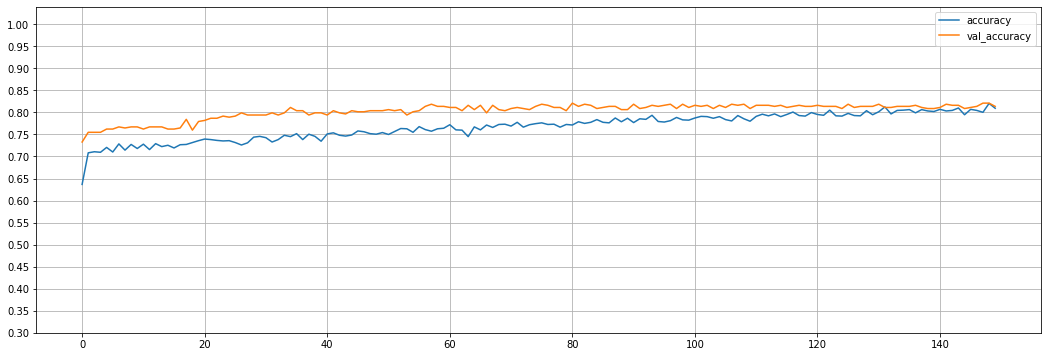

In [798]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.yticks([i/20 for i in range(0, 21)])
plt.ylim([0.3, 1.04])
plt.ylim([None, 1.04])
plt.grid()

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       220
           1       0.78      0.82      0.80       188

    accuracy                           0.81       408
   macro avg       0.81      0.81      0.81       408
weighted avg       0.82      0.81      0.81       408



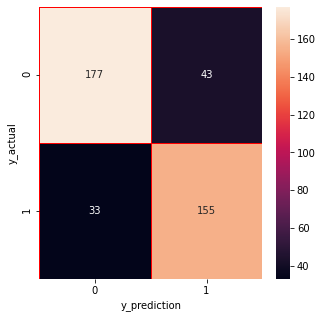

In [799]:
y_pred = model.predict(x_test)

y_actual = y_test
cm = confusion_matrix(list(y_actual.round().astype(int)), list(y_pred[:, 0].round().astype(int)))
texto = classification_report(list(y_actual.round().astype(int)), list(y_pred[:, 0].round().astype(int)), 
                              target_names=['0', '1'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Random Forest Classification Model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

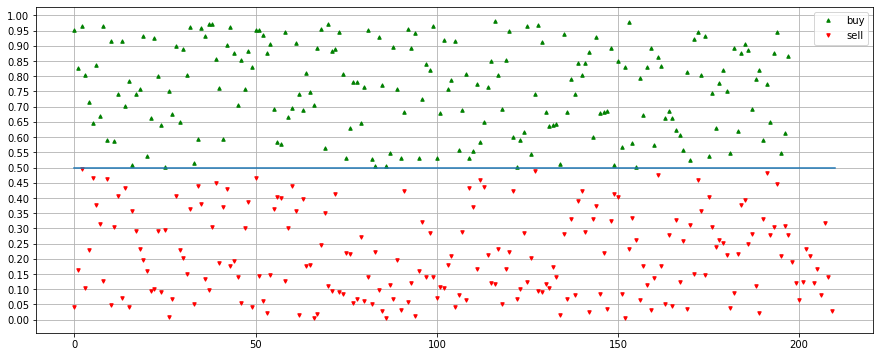

In [800]:
y_pred = model.predict(x_test)

plt.figure(figsize=(15, 6))
plt.plot(y_pred[y_pred>=.5], "^", c='g', markersize=3.5)
plt.plot(y_pred[y_pred<.5], "v", c='r', markersize=3.5)
plt.plot([0, max([len(y_pred[y_pred>=.5]), len(y_pred[y_pred<.5])])], [0.5, 0.5])
plt.yticks([i/20 for i in range(0, 21)])
plt.legend(['buy', 'sell'])
plt.grid()

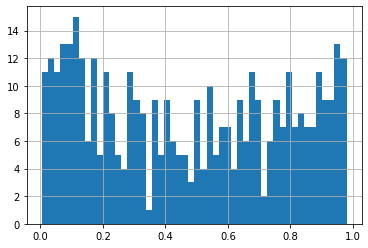

In [801]:
plt.hist(y_pred, bins=50);plt.grid()

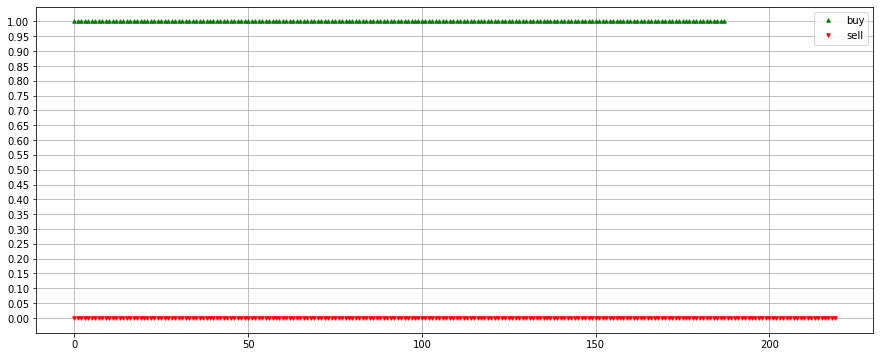

In [802]:
y_cur = y_test
plt.figure(figsize=(15, 6))
plt.plot(y_cur[y_cur>=.5], "^", c='g', markersize=3.5)
plt.plot(y_cur[y_cur<.5], "v", c='r', markersize=3.5)
plt.yticks([i/20 for i in range(0, 21)])
plt.legend(['buy', 'sell'])
plt.grid()

In [726]:
coin

'MATIC'

In [2129]:
kl2 = str(kl).replace(".", "d")
name2 = name.split(".")[0]
# print(name2, mm, kl2)
r223 = None
dj = pl.DataFrame(x_train, columns=ds.columns[-50:])
nnn1 = f'scaler_{name2}_{kl2}_{mm}.csv'.replace('datas', 'all')
nnn2 = f'model_{name2}_{kl2}_{mm}.h5'.replace('datas', 'all')
dj.to_csv(nnn1, sep="|")
model.save(nnn2)
print(nnn1)
print(nnn2)

scaler_all_b19_0d22_17.csv
model_all_b19_0d22_17.h5
